In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./Bases de datos utilizadas/howtowin_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.pop('gameId');

In [4]:
df.shape

(9879, 39)

In [5]:
df.isnull().any().sum()

0

In [6]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [7]:
X=df.loc[:,df.columns!='blueWins']
y = df['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, train_size=.8)

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_hat = model.predict(X_test)

accuracy = accuracy_score(y_pred=y_hat, y_true=y_test)
print(f'El score de accuracy en todo el dataframe es {accuracy}')

cv_score_all = cross_val_score(model,X,y,cv=10,scoring='accuracy')
cv_score_all_mean = cv_score_all.mean()
print('La media del cross validation score del modelo entrenado con RandomForests en todo el df es {:.3f}'.format(cv_score_all_mean))

El score de accuracy en todo el dataframe es 0.7272267206477733
La media del cross validation score del modelo entrenado con RandomForests en todo el df es 0.725


In [8]:
df_blue = df.copy()

try:
    df_blue.drop(columns=['gameId','redWardsPlaced','redWardsDestroyed','redFirstBlood','redKills','redDeaths','redAssists',
                    'redEliteMonsters','redDragons','redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
                    'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff','redExperienceDiff',
                    'redCSPerMin', 'redGoldPerMin'], inplace=True, axis=1)
except KeyError:
    pass

<AxesSubplot:>

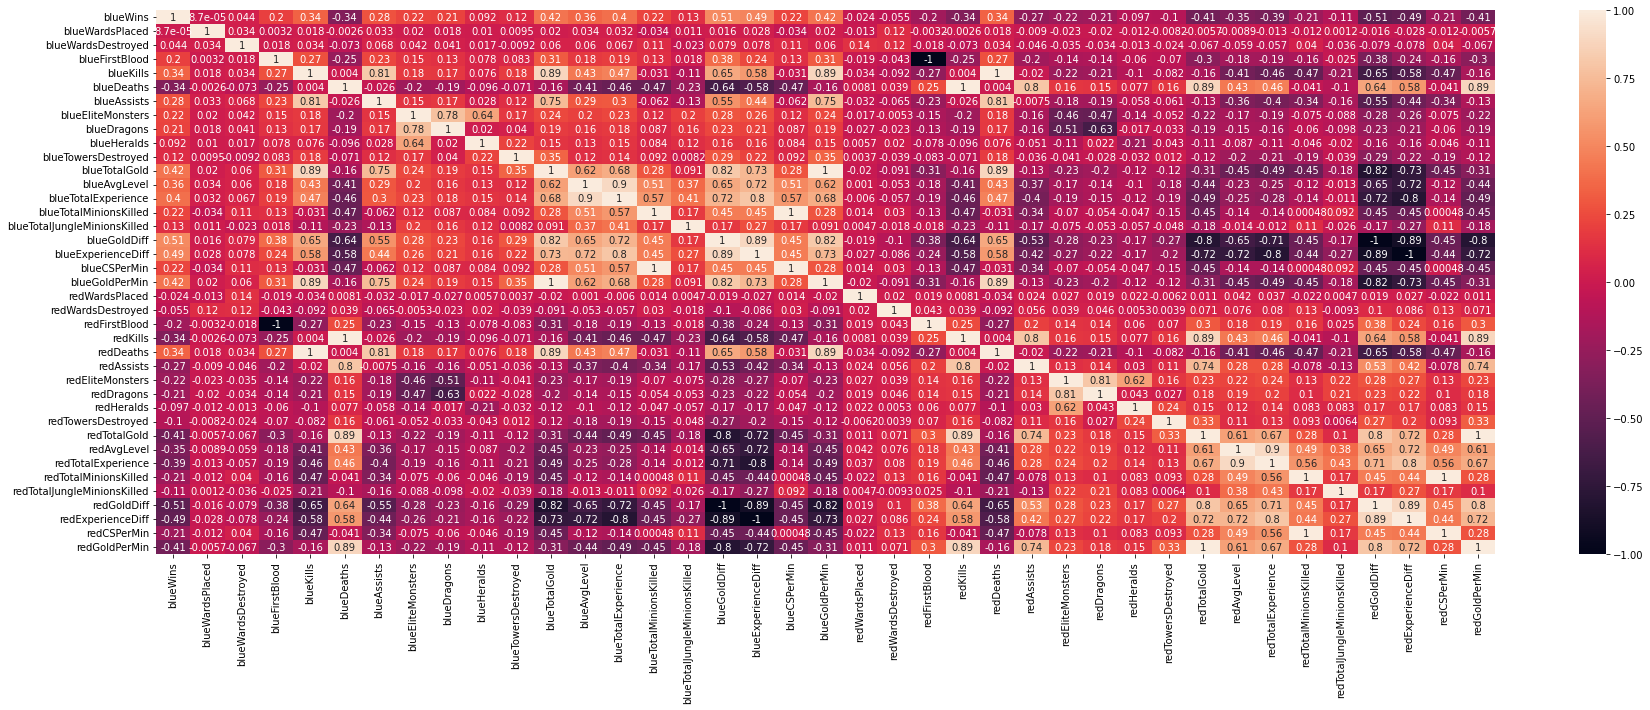

In [9]:
plt.figure(figsize=(30,10))
sns.heatmap(df_blue.corr(), annot=True, vmin=-1, vmax=1)

In [10]:
X = df_blue.loc[:,df_blue.columns!='blueWins']
y = df_blue['blueWins']

In [11]:
df_blue.shape

(9879, 39)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, train_size=.8)

In [13]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_hat = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_pred=y_hat, y_true=y_test)
print(f'El score de accuracy df de Blue Team es {accuracy}')

El score de accuracy df de Blue Team es 0.7257085020242915


In [16]:
cv_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')
cv_score_mean = cv_score.mean()
print('La media del cross validation score del modelo entrenado con RandomForests en df de Blue es {:.3f}'.format(cv_score_mean))


La media del cross validation score del modelo entrenado con RandomForests en df de Blue es 0.724


In [17]:
# Vemos que con todas las variables, parece que el resultado es mejor, de 0.721 a 0.727

In [18]:
#Vamos a probar a hacer PCA para disminuir variables.

In [19]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [20]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [30]:
col_names = []

for col in df.columns:
    col_names.append(col)

PCA_df = pd.DataFrame(data = modelo_pca.components_, columns = df.columns, index = col_names)

In [22]:
PCA_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,-0.154421,-0.005923,-0.024468,-0.110429,-0.182045,0.178052,-0.149650,-0.101307,-0.087505,-0.054555,...,0.070145,0.220401,0.194262,0.210368,0.130366,0.058651,0.274110,0.263039,0.130366,0.220401
blueWardsPlaced,-0.004214,0.009726,-0.025591,0.012762,0.309355,0.315964,0.272253,-0.008744,-0.004192,-0.008841,...,0.052913,0.220844,-0.044717,-0.055612,-0.226972,-0.130049,0.000741,0.004991,-0.226972,0.220844
blueWardsDestroyed,-0.041300,-0.019217,-0.007374,-0.054953,0.040500,-0.003710,0.020819,-0.446045,-0.451629,-0.158586,...,0.006734,-0.019949,-0.017029,-0.018260,-0.079912,0.109092,-0.059118,-0.065233,-0.079912,-0.019949
blueFirstBlood,-0.011756,-0.010799,-0.047363,0.009432,-0.102762,-0.110064,-0.071572,-0.114397,-0.069521,-0.097634,...,-0.029440,-0.214816,-0.322067,-0.333005,-0.259568,-0.176614,-0.006400,-0.004792,-0.259568,-0.214816
blueKills,-0.001792,0.011102,0.022740,-0.611403,-0.067383,0.077692,-0.108739,0.043206,0.001622,0.067178,...,-0.044792,0.021840,-0.115881,-0.124426,-0.089662,-0.184623,0.025767,-0.137884,-0.089662,0.021840


In [23]:
#vamos a analizar las componentes pca:

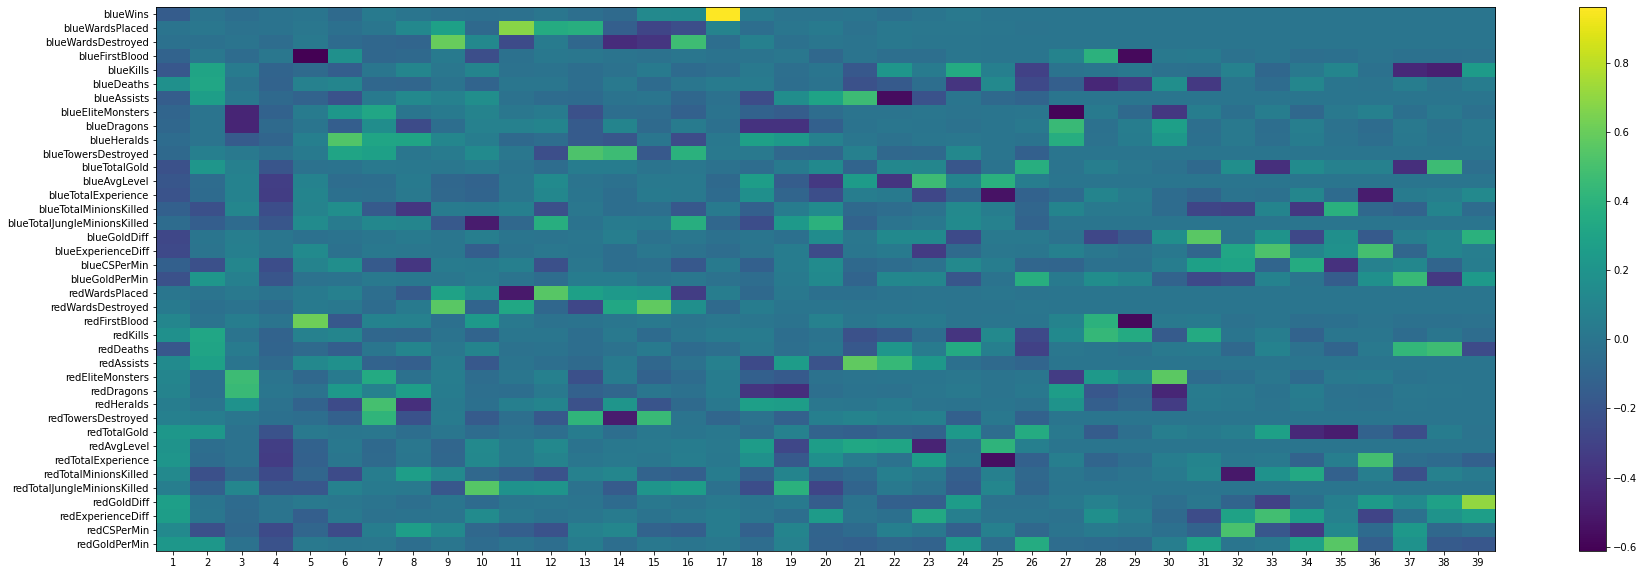

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

<BarContainer object of 39 artists>

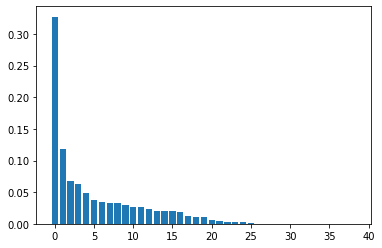

In [25]:
plt.bar(range(len(df.columns)), modelo_pca.explained_variance_ratio_)

In [26]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

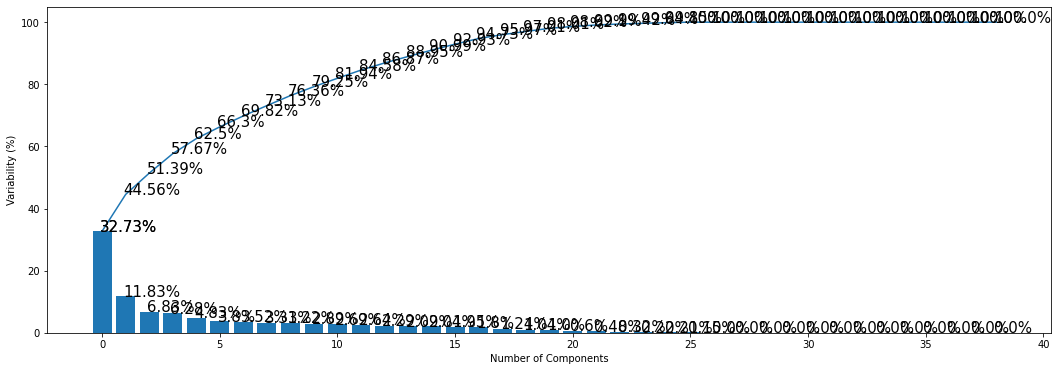

In [27]:
def pca_importance(pca):
    '''
    Given a PCA model, percentage of importance for each component is showed.
    '''
    components = pca.components_  # Axis of maximum variation
    n = len(components)
    x = np.arange(n)
    values = pca.explained_variance_ratio_ * 100
    acvalues = np.cumsum(values)

    fig, ax = plt.subplots(figsize=(18, 6))
    ax.bar(x, values)
    ax.plot(x, acvalues)
    for i in x:
        ax.annotate("{}%".format(round(values[i], 2)), (i-.1, values[i]),
                    fontsize=15)
        ax.annotate("{}%".format(round(acvalues[i], 2)), (i-.1, acvalues[i]),
                    fontsize=15)
    ax.set_xlabel("Number of Components")
    ax.set_ylabel("Variability (%)")

pca_importance(modelo_pca)

In [28]:
X = df.copy()
y = X.pop("blueWins")

print('blueWins' in X.columns)

False


In [32]:
pca_pipe_2 = make_pipeline(StandardScaler(), PCA(), RandomForestClassifier(min_samples_leaf=20))
pca_pipe_2.fit(X, y)
#  PCA(n_components=0.8)
# Se extrae el modelo entrenado del pipeline
# modelo_pca_2 = pca_pipe_2.named_steps['pca']

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=20))])

In [33]:
y.value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

In [34]:
from sklearn.metrics import accuracy_score

y_hat = pca_pipe_2.predict(X)

acc = accuracy_score(y_true=y, y_pred=y_hat)

print(acc)

0.7928940176131187


In [ ]:
rf_model = pca_pipe_2.named_steps['randomforestclassifier']

Text(0.5, 0, 'Relative Importance')

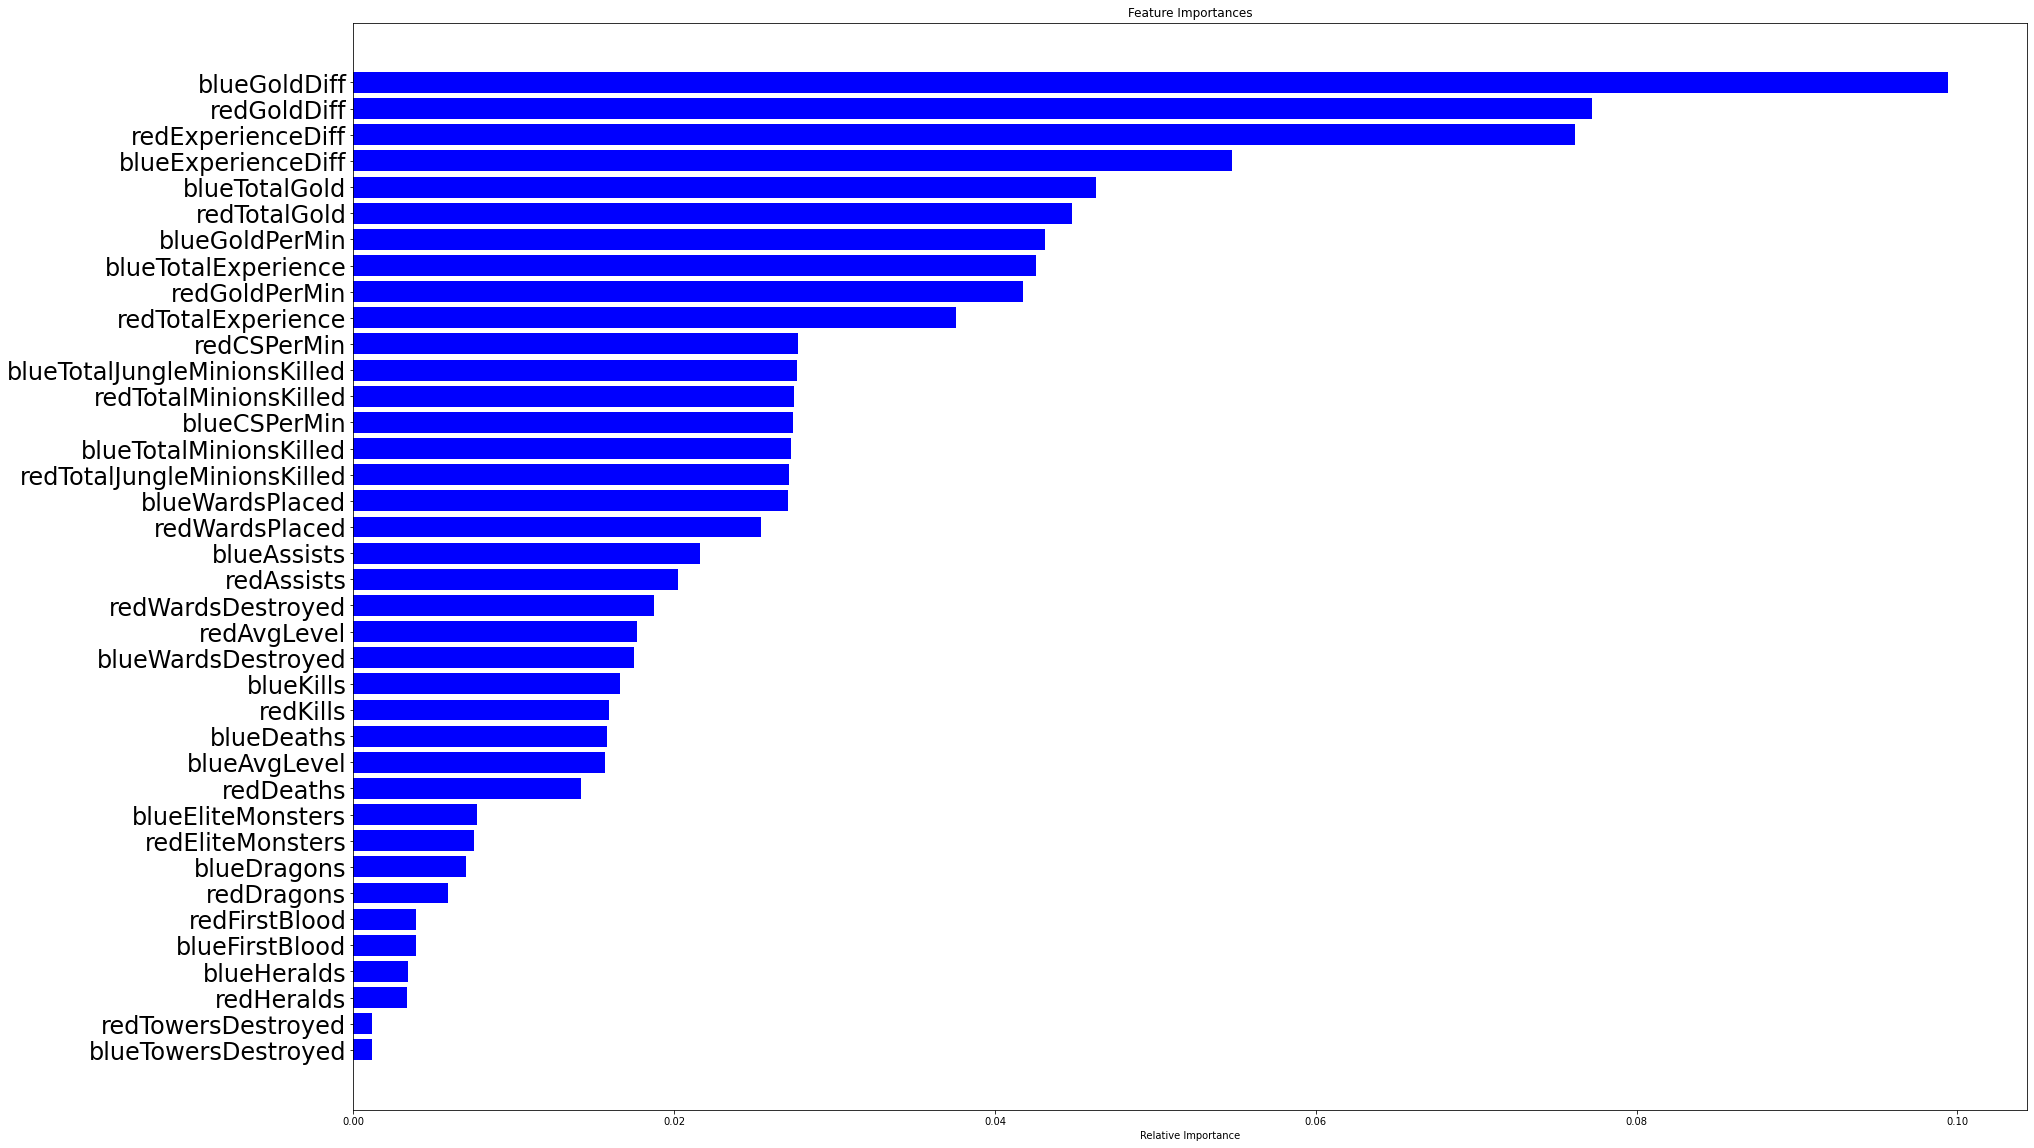

In [ ]:
plt.figure(figsize=(30, 20))

importances = rf_model.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices], fontsize=24)
plt.xlabel('Relative Importance')

In [ ]:
rf_model = pca_pipe_

NameError: name 'pca_pipe_' is not defined

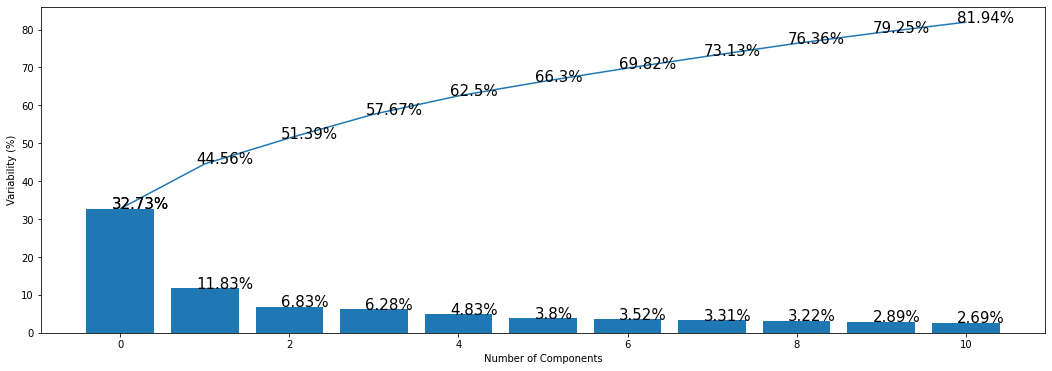

In [ ]:
pca_importance(modelo_pca_2)

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
df_pca_10 = pd.DataFrame(modelo_pca_2.components_, columns=df.columns, index=['pca_'+str(i) for i in range(11)])

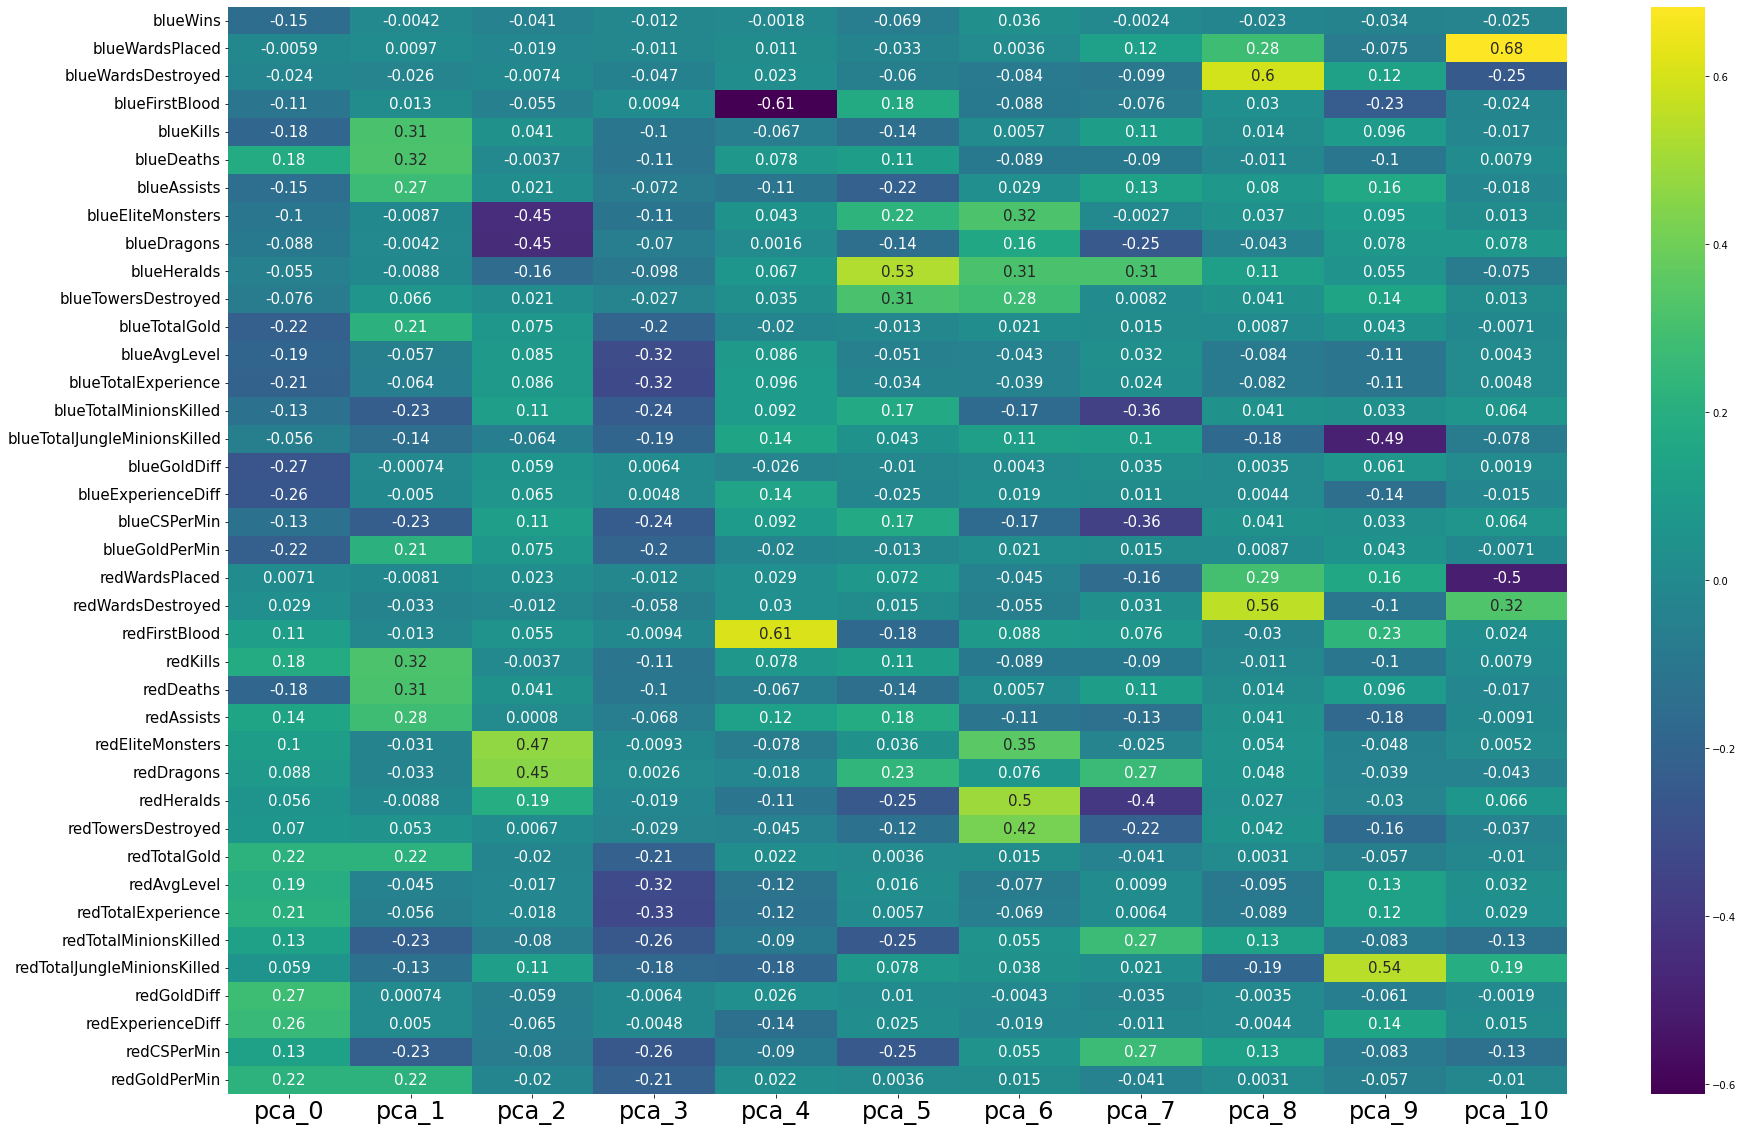

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_pca_10.T, annot=True, cmap='viridis', annot_kws={'size': 15})
plt.xticks(fontsize=24)
plt.yticks(fontsize=15);